In [16]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

In [101]:
file_url = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_v2.csv"
students = pd.read_csv(file_url)

#students.describe()

students.head()


,index,borough,age,gpa,days_missed,major,full_time,freshman,first_generation,employed,pell_grant,grade
0,8548,Queens,22.056321,3.148877,2,Computer Information Systems,1,1,0,0,1,P
1,13142,Outside NYC,22.345859,2.333427,16,Computer Science,1,1,1,0,1,DWFI
2,5703,Outside NYC,25.161810,3.201160,16,Computer Information Systems,0,1,1,1,1,DWFI
3,13839,Bronx,18.302638,2.715759,2,Computer Information Systems,1,1,0,1,0,P
4,5384,Outside NYC,25.673518,2.079928,2,Computer Information Systems,1,0,1,0,1,P


In [78]:
# recode DWFI as 0, P as 1
students["outcome"] = students.grade.apply(lambda x: int(x == "DWFI"))

# create dummy variables (0, 1) for borough and major
students_full = pd.get_dummies(students, columns=["borough", "major"], drop_first=True)
# students_full.columns

#split dataset in features and target variable
feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
       'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
       'major_Computer Science']

X = students_full[feature_cols] # Features
y = students_full.outcome # Target variable

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=15) # 70% training and 30% test

In [79]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# precision: true predicted positives/all predicted positives
print("Precision:",metrics.precision_score(y_test, y_pred))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.7510588235294118
Precision: 0.6895481200413935
Recall: 0.6217729393468118
[[4385  900]
 [1216 1999]]


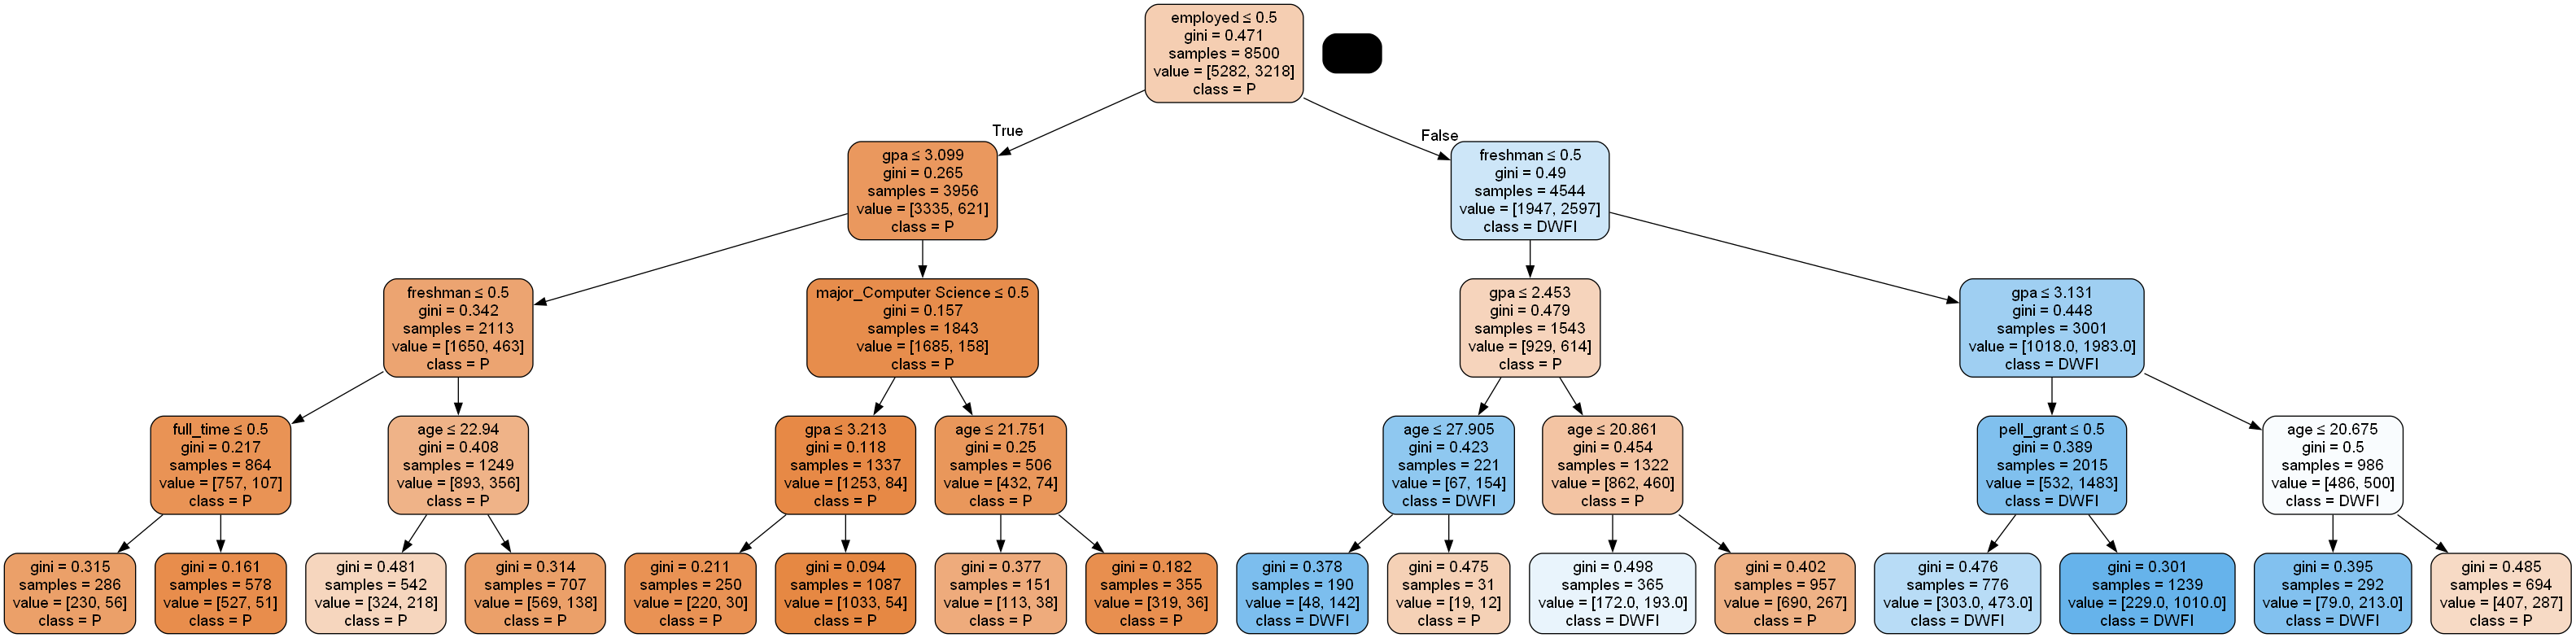

In [80]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['P','DWFI'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('students.png')
Image(graph.create_png())

In [81]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(criterion="gini", max_depth=3, n_estimators=100)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.7591764705882353
Precision: 0.7818532818532818
Recall: 0.5038880248833593
[[4833  452]
 [1595 1620]]


In [82]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(criterion="gini", max_depth=9, n_estimators=125)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.7798823529411765
Precision: 0.7348008385744235
Recall: 0.6541213063763608
[[4526  759]
 [1112 2103]]


In [117]:
### GRADIENT BOOSTING


# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(max_depth=3, n_estimators=60, learning_rate=0.4, verbose=True)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb))
### GRADIENT
# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)




predictions_df = pd.DataFrame({'index': X_test.index, 'predicted_score': y_pred_gb})
print(len(predictions_df))
# Write DataFrame to CSV
predictions_df.to_csv('predicted_scores.csv', index=False)

      Iter       Train Loss   Remaining Time 
         1           1.1587            0.50s
         2           1.0766            0.51s
         3           1.0297            0.49s
         4           0.9988            0.47s
         5           0.9743            0.46s
         6           0.9548            0.45s
         7           0.9413            0.44s
         8           0.9295            0.43s
         9           0.9183            0.42s
        10           0.9103            0.41s
        20           0.8697            0.32s
        30           0.8543            0.24s
        40           0.8396            0.16s
        50           0.8280            0.08s
        60           0.8103            0.00s
Accuracy: 0.784
Precision: 0.7334913647138503
Recall: 0.6737169517884914
[[4498  787]
 [1049 2166]]
8500


In [84]:
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")


Decision tree: 0.804
Random forest: 0.8528
Gradient boosting: 0.8536
Decision tree: 0.804
Random forest: 0.8528
Gradient boosting: 0.8536


In [87]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np

param_grid = {
    # "loss":["log_loss", "exponential"],
    "max_depth":[6],
    "learning_rate": [0.01, 0.5],
    "subsample":[0.10],
    "n_estimators":[50, 100, 150, 200]
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],

    }

gbt = GradientBoostingClassifier(random_state=8, verbose=False)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search = GridSearchCV(estimator=gbt, param_grid=param_grid, scoring="roc_auc", cv=None)
search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=8,
                                                  verbose=False),
             param_grid={'learning_rate': [0.01, 0.5], 'max_depth': [6],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.1]},
             scoring='roc_auc')

In [88]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])

# pd.concat([results_df.drop(columns="params"), results_df["params"].apply(pd.Series)])
print(search.best_params_)

# results_df = results_df.set_index(
#     results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
# ).rename_axis("kernel")
results_df[["param_learning_rate", "param_max_depth", "param_n_estimators", "param_subsample", "rank_test_score", "mean_test_score", "std_test_score"]]

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.1}


,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,rank_test_score,mean_test_score,std_test_score
3,0.01,6,200,0.1,1,0.849838,0.003492
2,0.01,6,150,0.1,2,0.849040,0.004382
1,0.01,6,100,0.1,3,0.847758,0.004057
0,0.01,6,50,0.1,4,0.844187,0.004268
4,0.5,6,50,0.1,5,0.589274,0.040874
6,0.5,6,150,0.1,6,0.527775,0.064587
7,0.5,6,200,0.1,6,0.527775,0.064587
5,0.5,6,100,0.1,8,0.526364,0.063165


In [110]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(**search.best_params_)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")


Accuracy: 0.7808235294117647
Precision: 0.7403982930298719
Recall: 0.6475894245723173
[[4555  730]
 [1133 2082]]
Gradient boosting: 0.8528


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [90]:
param_grid_rf = {
    "max_depth":[2, 5, 8, 10],
    "n_estimators":[100, 25, 200, 400],
    "min_impurity_decrease": [0.01, 0.03],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],
}

rf_grid = RandomForestClassifier(criterion="gini", random_state=8)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid_rf, scoring="roc_auc", cv=cv)
search_rf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=0),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'min_impurity_decrease': [0.01, 0.03],
                         'n_estimators': [100, 25, 200, 400]},
             scoring='roc_auc')

In [91]:
results_rf = pd.DataFrame(search_rf.cv_results_)
results_rf = results_rf.sort_values(by=["rank_test_score"])

print(search_rf.best_params_)

results_rf[["param_min_impurity_decrease", "param_max_depth", "param_n_estimators", "rank_test_score", "mean_test_score", "std_test_score"]]

{'max_depth': 2, 'min_impurity_decrease': 0.01, 'n_estimators': 100}


,param_min_impurity_decrease,param_max_depth,param_n_estimators,rank_test_score,mean_test_score,std_test_score
0,0.01,2,100,1,0.829808,0.006815
3,0.01,2,400,2,0.828999,0.007842
2,0.01,2,200,3,0.828771,0.007587
24,0.01,10,100,4,0.828488,0.006488
8,0.01,5,100,4,0.828488,0.006488
16,0.01,8,100,4,0.828488,0.006488
26,0.01,10,200,7,0.828034,0.008088
10,0.01,5,200,7,0.828034,0.008088
18,0.01,8,200,7,0.828034,0.008088
11,0.01,5,400,10,0.827994,0.007891


<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

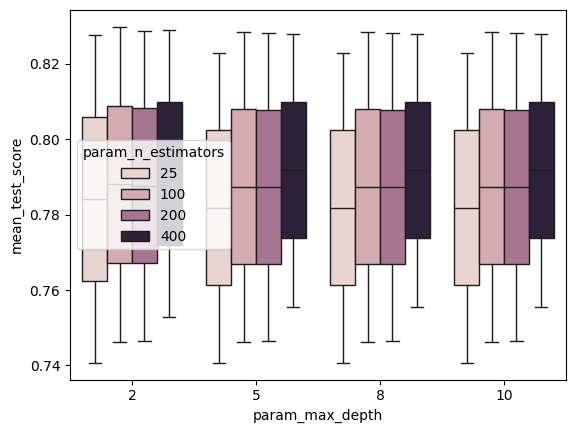

In [92]:
sns.boxplot(results_rf, x="param_max_depth", y="mean_test_score", hue="param_n_estimators")